In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.insert(0, "/content/drive/MyDrive/645")

In [ ]:
from brooks import *

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

A. For an order quantity of 500,000 doses, what is the net profit when demand is 400,000 doses and 600,000 doses, respectively?

In [ ]:
demand= 400000
order_qty= 500000
unit_price=20
unit_cost=12

In [ ]:
demand1= 600000

In [ ]:
profits = []
cost = order_qty * unit_cost

if demand >= order_qty:
    revenue = order_qty * unit_price
else:
    revenue = demand * unit_price

profits.append(revenue - cost)
print(profits)

[2000000]


In [ ]:
import pandas as pd

# Load data and filter out extreme outlier
demand_data = pd.read_excel("/content/drive/MyDrive/645/Datasets/OuRx (1).xlsx", sheet_name="Data")
new_data = demand_data.loc[demand_data["Vaccine Demand"] < 30000000]

# Define constants
wholesale_price = 12
retail_price = 20
order_quantity = 500000

def calculate_net_profit(demand):
    sold_quantity = min(order_quantity, demand)
    unsold_quantity = max(0, order_quantity - demand)
    profit_from_sales = sold_quantity * (retail_price - wholesale_price)
    net_profit = profit_from_sales - unsold_quantity * wholesale_price
    return net_profit

net_profit_400k = calculate_net_profit(400000)
net_profit_600k = calculate_net_profit(600000)

# Print results
print(f"Net Profit for Demand = 400,000: ${net_profit_400k}")
print(f"Net Profit for Demand = 600,000: ${net_profit_600k}")


Net Profit for Demand = 400,000: $2000000
Net Profit for Demand = 600,000: $4000000


B. Plot a histogram of the demand data.  What distribution seems appropriate for modeling demand?

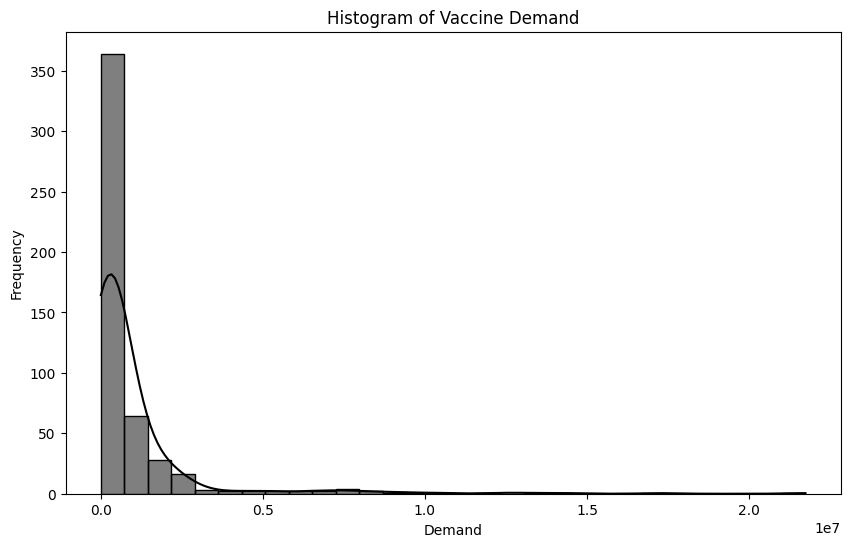

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(new_data["Vaccine Demand"], bins=30, kde=True, color='black')
plt.title('Histogram of Vaccine Demand')
plt.xlabel('Demand')
plt.ylabel('Frequency')
plt.show()

In [ ]:
chi=test_distribution(new_data["Vaccine Demand"], distribution= 'lognormal')

For a lognormal distribution, the log mean estimate is 12.622927 and the log stdev estimate is 1.486323.
The test statistic for a lognormal distribution is 29.309394 and the p-value is 1.000000.


In [ ]:
test_distribution(new_data["Vaccine Demand"],distribution="triangular")

For a triangular distribution, the min estimate is 3156.990111, the mode estimate is 3156.994858, and the max estimate is 21785047.124720.
The test statistic for a triangular distribution is 4617.028624 and the p-value is 0.000000.


(3156.9901109155835, 3156.9948579967077, 21785047.124719594)

In [ ]:
test_distribution(new_data["Vaccine Demand"],distribution="uniform")

For a uniform distribution, the min estimate is 3157.000000 and the max estimate is 21738695.000000.
The test statistic for a uniform distribution is 8694.279483 and the p-value is 0.000000.


(3157.0, 21738695.0)

In [ ]:
test_distribution(new_data["Vaccine Demand"],distribution="exponential")

For an exponential distribution, the scale parameter estimate is 924033.462926.
The test statistic for a exponential distribution is 184.843432 and the p-value is 0.000133.


924033.4629258517

In [ ]:
test_distribution(new_data["Vaccine Demand"],distribution="normal")

For a normal distribution, the mean estimate is 924033.462926 and the standard deviation estimate is 2069466.437573.
The test statistic for a normal distribution is 2299.479433 and the p-value is 0.000000.


(924033.4629258517, 2069466.4375729202)

c. Representing flu vaccine demand with the type of random variable you identified in part (B), create a simulation model and determine a 95% credible interval for net profit for an order quantity of 500,000 doses.  What is the probability of running out of the vaccine?

In [ ]:
import numpy as np

wholesale_price = 12
retail_price = 20
order_quantity = 500000
num_simulations = 1000  # Adjust the number of simulations as needed

# Parameters for the lognormal distribution (you need to adjust these based on your fitting results)
mean = 12.622927
stdv = 1.486323

# Simulate demand using lognormal distribution
simulated_demand = np.random.lognormal(mean, stdv, size=num_simulations)

# Calculate net profit for each simulation
profits = np.minimum(order_quantity, simulated_demand) * (retail_price - wholesale_price)

# Determine 95% credible interval for net profit
lower_bound = np.percentile(profits, 2.5)
upper_bound = np.percentile(profits, 97.5)

# Calculate probability of running out of the vaccine
probability_running_out = np.mean(simulated_demand > order_quantity)

# Print results
print(f"95% Credible Interval for Net Profit: ${lower_bound:.2f} to ${upper_bound:.2f}")
print(f"Probability of Running Out of Vaccine: {probability_running_out * 100:.2f}%")

95% Credible Interval for Net Profit: $115431.67 to $4000000.00
Probability of Running Out of Vaccine: 39.80%


D. Evaluate changing the policy for the order quantity.  Simulate for 400,000, 450,000, 500,000, 550,000, and 600,000 doses.  For which value is the expected profit maximized?  For each policy, what is the probability of running out of the vaccine?

In [ ]:
import numpy as np

wholesale_price = 12
retail_price = 20
order_quantities = [400000, 450000, 500000, 550000, 600000]  # Different order quantities to simulate
num_simulations = 1000

# Parameters for the lognormal distribution
mu = 12.622927
sigma = 1.486323

# Function to calculate profits for given demand and order quantity
def calculate_profits(order_qty, demands, wholesale_price, retail_price):
    profits = []
    for demand in demands:
        cost = order_qty * wholesale_price
        revenue = min(demand, order_qty) * retail_price
        profit = revenue - cost
        profits.append(profit)
    return profits

for order_qty in order_quantities:
    rg = np.random.default_rng()  # Initialize random number generator
    simulated_demand = rg.lognormal(mean=mu, sigma=sigma, size=num_simulations)  # Simulate demand using lognormal distribution

    profits = calculate_profits(order_qty, simulated_demand, wholesale_price, retail_price)

    # Determine 95% credible interval for net profit
    lower_bound = np.percentile(profits, 2.5)
    upper_bound = np.percentile(profits, 97.5)

    # Calculate probability of running out of the vaccine
    probability_running_out = np.mean(simulated_demand > order_qty)

    # Calculate expected profit
    expected_profit = np.mean(profits)

    # Print results for each policy
    print(f"Order Quantity: {order_qty}")
    print(f"Expected Profit: ${expected_profit:.2f}")
    print(f"95% Credible Interval for Net Profit: ${lower_bound:.2f} to ${upper_bound:.2f}")
    print(f"Probability of Running Out of Vaccine: {probability_running_out * 100:.2f}%")
    print("---------------")


Order Quantity: 400000
Expected Profit: $364692.29
95% Credible Interval for Net Profit: $-4426655.47 to $3200000.00
Probability of Running Out of Vaccine: 40.30%
---------------
Order Quantity: 450000
Expected Profit: $261559.65
95% Credible Interval for Net Profit: $-5091663.18 to $3600000.00
Probability of Running Out of Vaccine: 39.20%
---------------
Order Quantity: 500000
Expected Profit: $22386.11
95% Credible Interval for Net Profit: $-5669400.53 to $4000000.00
Probability of Running Out of Vaccine: 37.80%
---------------
Order Quantity: 550000
Expected Profit: $-338399.58
95% Credible Interval for Net Profit: $-6372511.17 to $4400000.00
Probability of Running Out of Vaccine: 34.40%
---------------
Order Quantity: 600000
Expected Profit: $-487685.35
95% Credible Interval for Net Profit: $-6852081.67 to $4800000.00
Probability of Running Out of Vaccine: 32.90%
---------------
